In [1]:
# set up things
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# load necessary libraries
# you should install cartopy with 'conda install -c conda-forge cartopy'
import xarray as xr
import numpy as np

import matplotlib as mpl  
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# load nmc_met_io for retrieving micaps server data
import sys
print(sys.path)
sys.path.insert(0, "/home/x711/code/nmc_met_io") # .append("/home/x711/code/nmc_met_io")
print(sys.path)

from nmc_met_io.retrieve_cassandraDB  import *


xr.set_options(display_style="text")

['/home/x711/code/ec', '/home/x711/anaconda3/lib/python39.zip', '/home/x711/anaconda3/lib/python3.9', '/home/x711/anaconda3/lib/python3.9/lib-dynload', '', '/home/x711/anaconda3/lib/python3.9/site-packages']
['/home/x711/code/nmc_met_io', '/home/x711/code/ec', '/home/x711/anaconda3/lib/python39.zip', '/home/x711/anaconda3/lib/python3.9', '/home/x711/anaconda3/lib/python3.9/lib-dynload', '', '/home/x711/anaconda3/lib/python3.9/site-packages']


## 1.1 读取多个时次的模式预报数据 TEMP

In [3]:
%time
directory850 = "ECMWF_HR/HGT/850"
directory500 = "ECMWF_HR/HGT/500"
fhours = np.arange(0, 120, 24)
filenames = ['22062220.'+'%03d'%(fhour) for fhour in fhours]
H850 = get_model_grids(directory850, filenames, varname='hgt', varattrs={'long_name':'850hPa HGT', 'units':'m'}, cache=False)
H500 = get_model_grids(directory500, filenames, varname='hgt', varattrs={'long_name':'500hPa HGT', 'units':'m'}, cache=False)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.77 µs


In [4]:
H500

<xarray.Dataset>
Dimensions:                  (time: 5, level: 1, lat: 281, lon: 361)
Coordinates:
  * time                     (time) datetime64[ns] 2022-06-22T20:00:00 ... 20...
  * level                    (level) float32 500.0
  * lat                      (lat) float64 -10.0 -9.75 -9.5 ... 59.5 59.75 60.0
  * lon                      (lon) float64 60.0 60.25 60.5 ... 149.5 149.8 150.0
    forecast_reference_time  datetime64[ns] 2022-06-22T20:00:00
    forecast_period          (time) float64 0.0 24.0 48.0 72.0 96.0
Data variables:
    hgt                      (time, level, lat, lon) float32 584.5 ... 568.4
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra DB

<xarray.DataArray 'hgt' (time: 5, lat: 120, lon: 160)>
array([[[438.6788 , 438.66632, 438.64133, ..., 437.3663 , 437.2163 ,
         437.16632],
        [438.79132, 438.8413 , 438.7538 , ..., 437.3913 , 437.31628,
         437.30383],
        [439.01633, 439.0413 , 438.92877, ..., 437.4163 , 437.3788 ,
         437.36633],
        ...,
        [433.92883, 434.02884, 434.3913 , ..., 427.19128, 427.1663 ,
         427.1413 ],
        [433.31628, 433.9913 , 434.36627, ..., 426.94135, 426.9413 ,
         426.8788 ],
        [432.86633, 433.71634, 433.52878, ..., 426.6663 , 426.66632,
         426.60382]],

       [[439.98468, 439.9847 , 439.84097, ..., 437.9722 , 437.8597 ,
         437.72842],
        [440.07843, 440.0097 , 439.82217, ..., 437.90344, 437.82846,
         437.7597 ],
        [440.13467, 440.0597 , 439.89093, ..., 437.83472, 437.79718,
         437.79095],
...
        [434.80124, 435.12622, 435.32623, ..., 426.17624, 426.02625,
         425.86374],
        [434.57626, 435.17

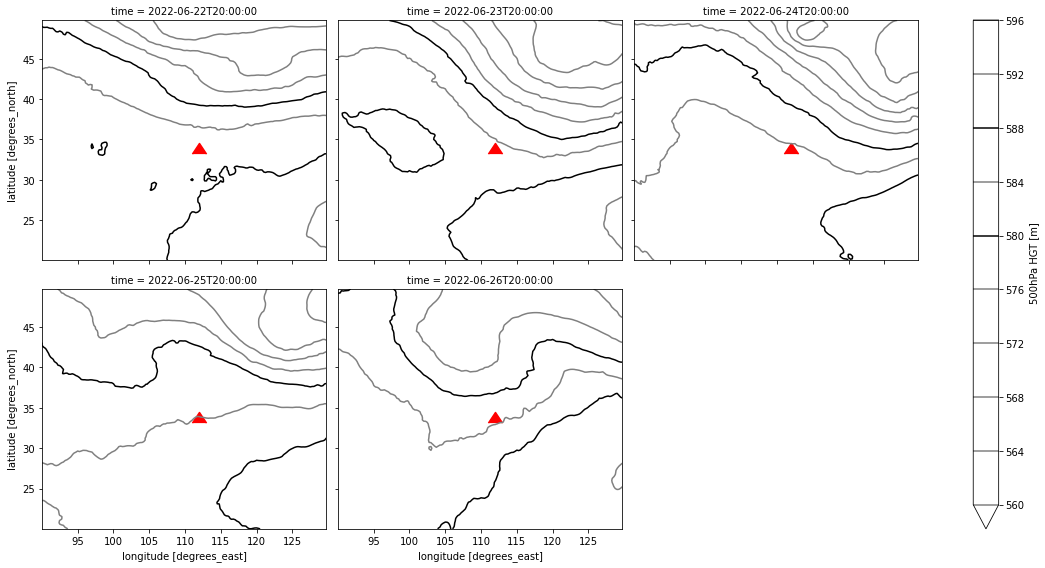

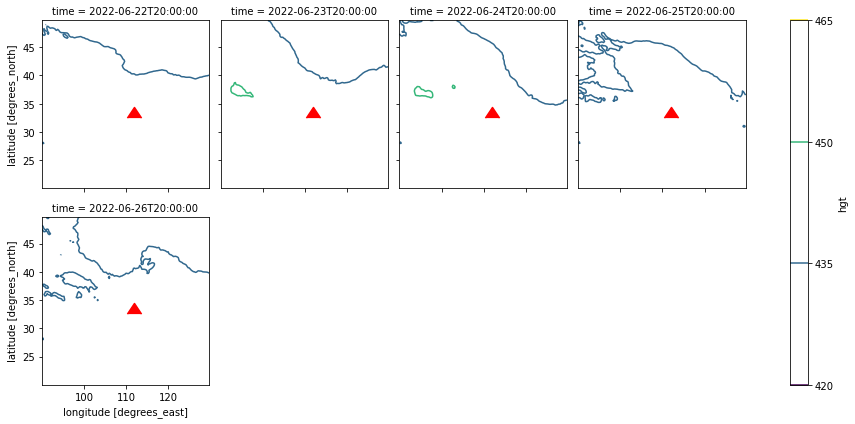

In [5]:
# 绘制图像
left = 90
right=130
top = 50
bottom = 20

H850 = H850.hgt.isel(level=0).sel(lon=np.arange(left,right,0.25),lat=np.arange(bottom,top,0.25), method="nearest")
H500 = H500.hgt.isel(level=0).sel(lon=np.arange(left,right,0.25),lat=np.arange(bottom,top,0.25), method="nearest")

H500colors = ['gray']*10
H500colors[-3] = H500colors[-5] = 'black'

p = H500.plot.contour(figsize=(16, 8), col='time', col_wrap=3, levels=np.arange(560,600,4), colors = H500colors, add_colorbar=True) #[24, 28]

for ax in p.axes.flat:
    ax.scatter(112, 34.5, s=200, c='red', marker=6)



H500_850 = H500 - H850
print(H500_850)

p = H500_850.plot.contour(col='time', col_wrap=4, levels=3,add_colorbar=True)

for ax in p.axes.flat:
    ax.scatter(112, 34.5, s=200, c='red', marker=6)

## 1.2 Draw High Plot

In [6]:
plot500 = get_station_data("UPPER_AIR/PLOT/500", "20220623080000.000", dropna=True, cache=False)
plot500

,ID,lon,lat,Alt,Wind_angle,Wind_speed,Dewpoint_depression,Geopotential_hight,Temp,time
0,83971,-51.180000,-30.000000,3.000000,275.0,39.000000,NaN,NaN,NaN,2022-06-23 08:00:00
1,55299,92.059998,31.480000,4508.299805,106.0,2.800000,3.100000,587.799988,0.1,2022-06-23 08:00:00
2,72201,-81.750000,24.549999,4.000000,10.0,6.000000,16.000000,587.000000,-6.1,2022-06-23 08:00:00
3,48650,101.699997,2.720000,17.000000,65.0,7.000000,NaN,NaN,NaN,2022-06-23 08:00:00
4,53772,112.580002,37.619999,777.500000,291.0,18.700001,42.500000,580.099976,-4.0,2022-06-23 08:00:00
...,...,...,...,...,...,...,...,...,...,...
246,56312,94.360001,29.650000,2989.600098,41.0,0.400000,1.200000,588.000000,-3.0,2022-06-23 08:00:00
247,58362,121.440002,31.389999,6.700000,245.0,8.000000,17.299999,588.400024,-1.3,2022-06-23 08:00:00
248,54778,122.370003,37.150002,78.800003,246.0,17.200001,0.300000,579.000000,-3.6,2022-06-23 08:00:00
249,22522,34.650002,64.949997,8.000000,200.0,6.000000,11.000000,558.000000,-17.1,2022-06-23 08:00:00


In [7]:
plot500 = plot500.dropna(how='any')
plot500 = plot500[(bottom <= plot500['lat']) & (plot500['lat'] <= top) &
                    (left <= plot500['lon']) & (plot500['lon'] <= right)]

/tmp/ipykernel_3477/349443167.py:7: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  cntr = ax.tricontour(plot500.lon, plot500.lat, plot500.Geopotential_hight, levels=levels, add_colorbar=True)


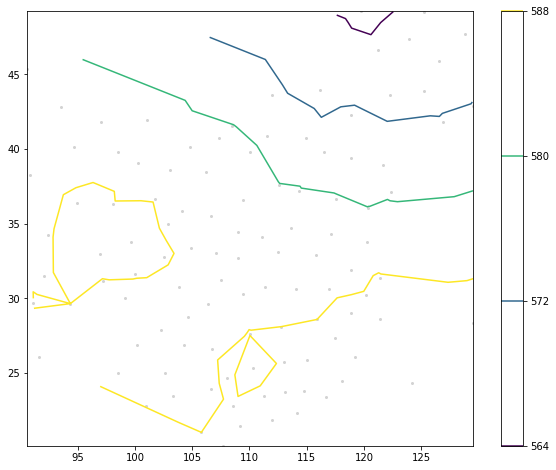

In [8]:
# plot:
fig, ax = plt.subplots(figsize=(10, 8))

levels = [564, 572, 580, 588]

ax.plot(plot500.lon, plot500.lat, 'o', markersize=2, color='lightgrey')
cntr = ax.tricontour(plot500.lon, plot500.lat, plot500.Geopotential_hight, levels=levels, add_colorbar=True)

fig.colorbar(cntr, ax=ax)

## 1.3 Draw High Diff

In [9]:
dti = pd.date_range("2022-06-22 20:00", periods=6, freq="-12H").to_series()

filenames = dti.dt.strftime("%y%m%d%H")


directory500 = "ECMWF_HR/HGT/500"
fhours = np.arange(12, 12*7, 12)
filenames = filenames + '.' + ['%03d'%(fhour) for fhour in fhours]

print(filenames)

H500 = get_model_grids(directory500, filenames, varname='hgt', varattrs={'long_name':'500hPa HGT', 'units':'m'}, cache=False)

H500

2022-06-22 20:00:00    22062220.012
2022-06-22 08:00:00    22062208.024
2022-06-21 20:00:00    22062120.036
2022-06-21 08:00:00    22062108.048
2022-06-20 20:00:00    22062020.060
2022-06-20 08:00:00    22062008.072
Freq: -12H, dtype: object


<xarray.Dataset>
Dimensions:                  (time: 6, level: 1, lat: 281, lon: 361)
Coordinates:
  * time                     (time) datetime64[ns] 2022-06-23T08:00:00 ... 20...
  * level                    (level) float32 500.0
  * lat                      (lat) float64 -10.0 -9.75 -9.5 ... 59.5 59.75 60.0
  * lon                      (lon) float64 60.0 60.25 60.5 ... 149.5 149.8 150.0
    forecast_reference_time  (time) datetime64[ns] 2022-06-22T20:00:00 ... 20...
    forecast_period          (time) float64 12.0 24.0 36.0 48.0 60.0 72.0
Data variables:
    hgt                      (time, level, lat, lon) float32 584.6 ... 564.2
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra DB

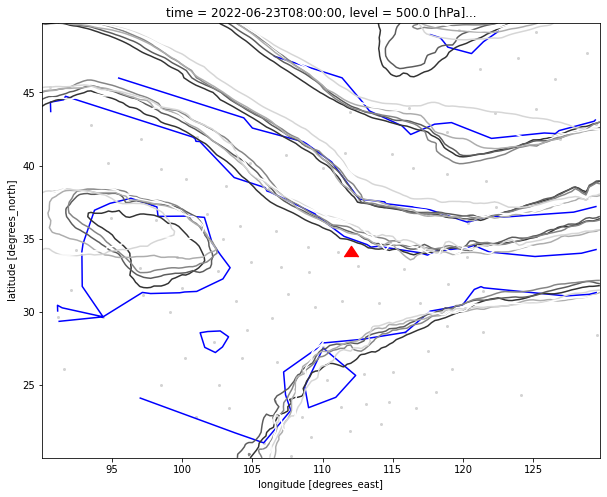

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))

levels = [564, 572, 580, 584,  588]

ax.plot(plot500.lon, plot500.lat, 'o', markersize=2, color='lightgrey')
cntr = ax.tricontour(plot500.lon, plot500.lat, plot500.Geopotential_hight, levels=levels, colors = 'blue') #add_colorbar=True

#fig.colorbar(cntr, ax=ax)
ax.scatter(112, 34.5, s=200, c='red', marker=6)

H500Area = H500.hgt.isel(level=0).sel(lon=np.arange(left,right,0.25),lat=np.arange(bottom,top,0.25), method="nearest")

for index in range(0,6):
    colors = index/5 * (1-0.2) + 0.2
    H500Area.isel(time=index).plot.contour(ax = ax, levels=levels, colors = str(colors) )
    pass


In [11]:
['gray']*6

['gray', 'gray', 'gray', 'gray', 'gray', 'gray']